In [14]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns




In [3]:

terror_data = pd.read_csv('C:/Users/user/Desktop/My Work/GTD/globalterrorismdb_0718dist.csv',sep=',',encoding="ISO-8859-1")
terror_data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
print ('dataframe shape: ', terror_data.shape)

dataframe shape:  (181691, 135)


In [4]:
columns_select = ['eventid', 'iyear', 'country_txt', 'region_txt', 'city', 'latitude', 'longitude', 'success', 
                  'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'nkill', 'nwound', 'gname']

columns_names = ['Id', 'Year', 'Country', 'Region', 'City', 'Lat', 'Long', 'Success', 'AttackType', 
                 'TargetType', 'WeaponType', 'Kill', 'Wounded',  'TerroristGroup']

terror_data_selected = terror_data[columns_select]

terror_data_selected.columns = columns_names

print ('selected dataframe shape: ', terror_data_selected.shape)

terror_data_selected.head(5)

selected dataframe shape:  (181691, 14)


,Id,Year,Country,Region,City,Lat,Long,Success,AttackType,TargetType,WeaponType,Kill,Wounded,TerroristGroup
0,197000000001,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Unknown,1.0,0.0,MANO-D
1,197000000002,1970,Mexico,North America,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,23rd of September Communist League
2,197001000001,1970,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,Unknown,1.0,0.0,Unknown
3,197001000002,1970,Greece,Western Europe,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN,Unknown
4,197001000003,1970,Japan,East Asia,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN,Unknown


In [5]:
#checking if there is any null or not
print ('null values in entire dataframe: ', terror_data_selected.isnull().values.any())  
print ('total number of null values: ', terror_data_selected.isnull().sum().sum())

null values in entire dataframe:  True
total number of null values:  36171


In [6]:
print ('NaNs in every column: \n', terror_data_selected.isna().sum())

NaNs in every column: 
 Id                    0
Year                  0
Country               0
Region                0
City                434
Lat                4556
Long               4557
Success               0
AttackType            0
TargetType            0
WeaponType            0
Kill              10313
Wounded           16311
TerroristGroup        0
dtype: int64


Text(0.5, 1.0, 'Number of Terrorist Attack Year by Year')

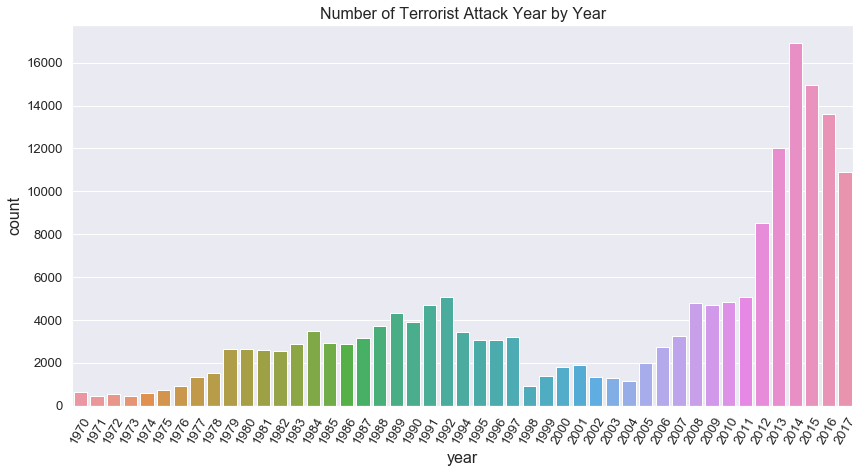

In [7]:
#Showing Attack by Year
f=plt.figure(figsize=(14,7))


sns.set(font_scale=1.2)
yr_count = sns.countplot(x='Year', data=terror_data_selected,)
yr_count.set_xticklabels(yr_count.get_xticklabels(),rotation=60)
plt.ylabel("count",fontsize=16)
plt.xlabel("year",fontsize=16)
plt.title('Number of Terrorist Attack Year by Year', fontsize=16)


Text(0.5, 1.0, 'Number of Terrorist Attack by Region')

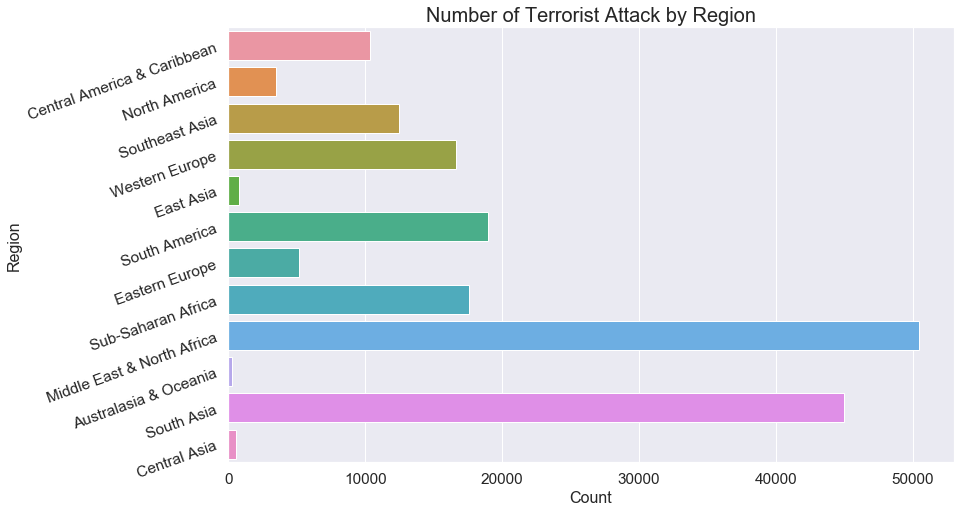

In [8]:
#Showing attacks by Regions
f = plt.figure(figsize=(13, 8))

sns.set(font_scale=1.4)
yr_count = sns.countplot(y='Region', data=terror_data_selected,)
yr_count.set_yticklabels(yr_count.get_yticklabels(), rotation=20)
plt.ylabel('Region', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.title('Number of Terrorist Attack by Region', fontsize=20)

Text(0.5, 1.0, 'Types of Terrorist Attacks')

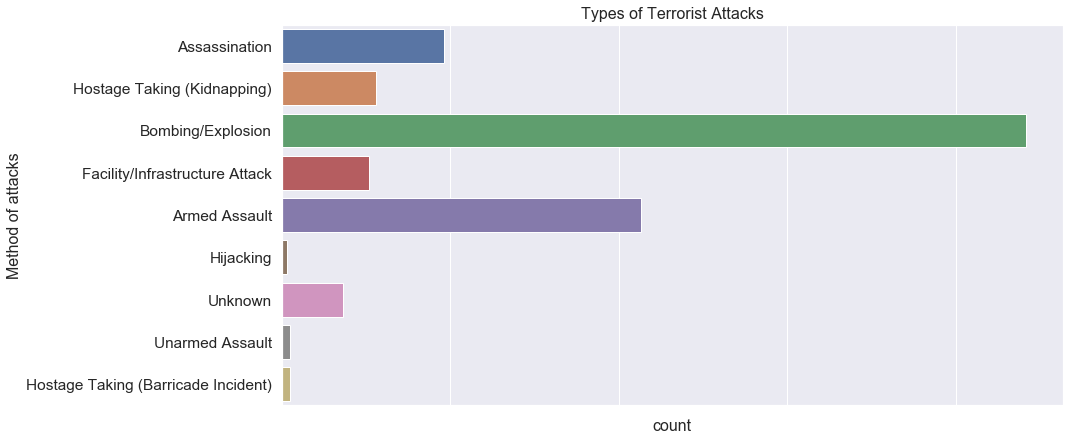

In [9]:
#showing the types of attcks done throughout
f= plt.figure(figsize=(14,7))

sns.set(font_scale=1.4)
yr_count= sns.countplot(y='AttackType', data=terror_data_selected,)
yr_count.set_xticklabels(yr_count.get_xticklabels(),rotation=30)
plt.xlabel('count',fontsize=16)
plt.ylabel('Method of attacks',fontsize=16)
plt.title('Types of Terrorist Attacks',fontsize=16)

Text(0.5, 1.0, 'Top 15 Countries: Most Attacks by Terrorist Groups')

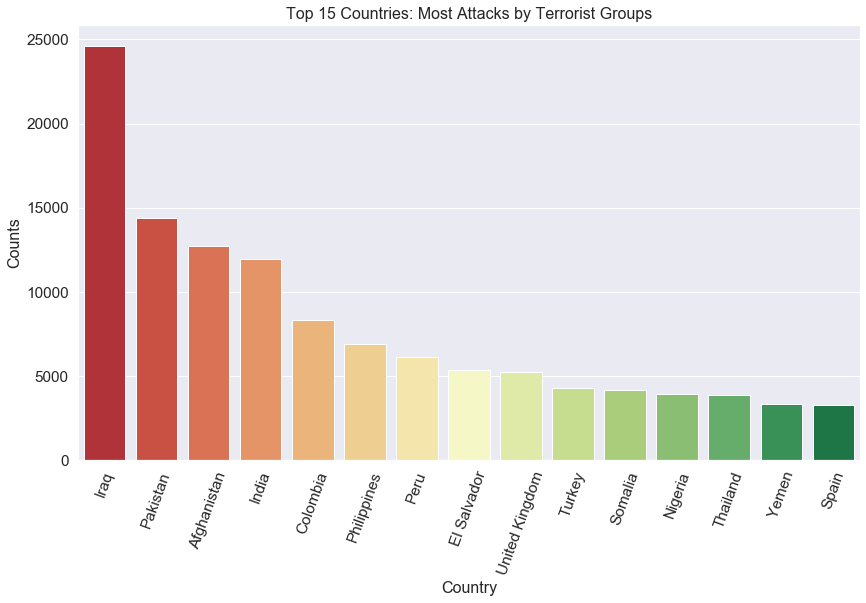

In [10]:
# top country attack
fig= plt.figure(figsize=(14, 8))
sns.set(font_scale=1.4)

Atk_country = sns.barplot(x=terror_data_selected['Country'].value_counts()[0:15].index, y=terror_data_selected['Country'].value_counts()[0:15], palette='RdYlGn')
Atk_country.set_xticklabels(Atk_country.get_xticklabels(), rotation=70)
Atk_country.set_xlabel('Country', fontsize=16)
Atk_country.set_ylabel('Counts', fontsize=16)
plt.title('Top 15 Countries: Most Attacks by Terrorist Groups', fontsize=16)

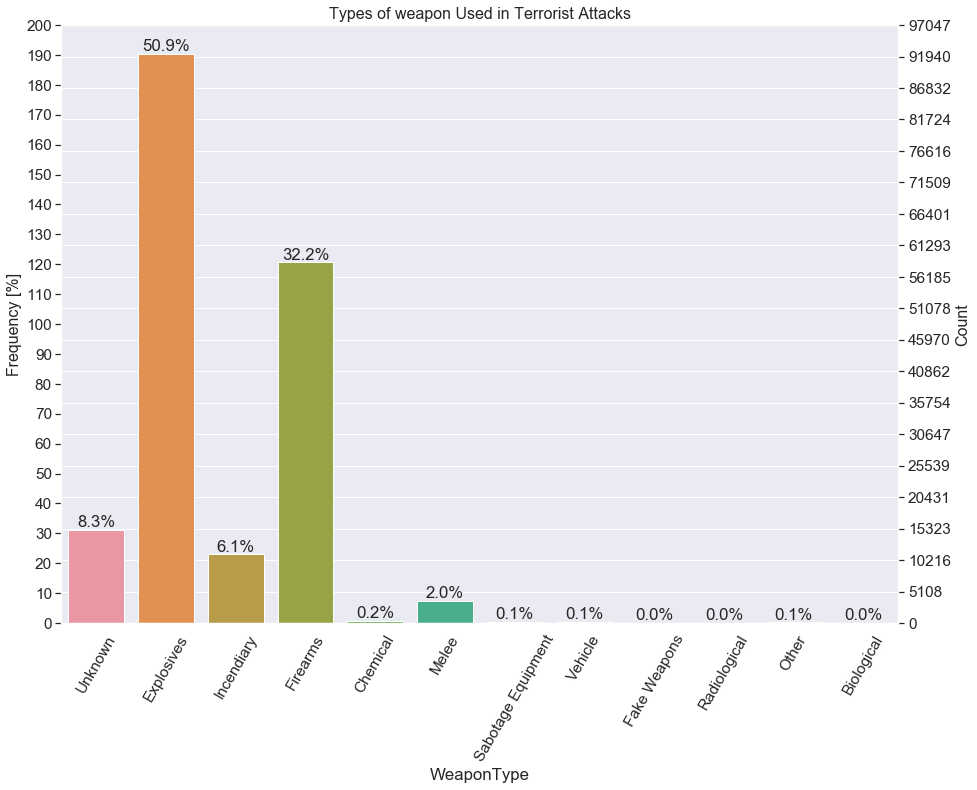

In [15]:
f = plt.figure(figsize=(15, 11))
sns.set(font_scale=1.4)

terror_data_selected['WeaponType'] = terror_data_selected['WeaponType']

ncount = len(terror_data_selected)

yr_count = sns.countplot(x='WeaponType', data=terror_data_selected,)
yr_count.set_xticklabels(yr_count.get_xticklabels(), rotation=60)
plt.title('Types of weapon Used in Terrorist Attacks', fontsize=16)

ax2=yr_count.twinx()

ax2.yaxis.tick_left()
yr_count.yaxis.tick_right()

# Also switch the labels over
yr_count.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]', fontsize=16)

for p in yr_count.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    yr_count.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
yr_count.yaxis.set_major_locator(ticker.LinearLocator(20))

# Fix the frequency range to 0-100
ax2.set_ylim(0,200)

yr_count.set_ylabel('Count', fontsize=16)

ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

ax2.grid(None)



In [21]:
terror_data_selected['WeaponType'].value_counts()

Explosives            92426
Firearms              58524
Unknown               15157
Incendiary            11135
Melee                  3655
Chemical                321
Sabotage Equipment      141
Vehicle                 136
Other                   114
Biological               35
Fake Weapons             33
Radiological             14
Name: WeaponType, dtype: int64

In [17]:
# now region is analysed for terrorist attacks
# by using crosstab to create a table where will have years as rows and number of attacks in every year in different region as column.
reg_yr = pd.crosstab(terror_data_selected.Year, terror_data_selected.Region)

reg_yr.head(6)

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317
1975,0,9,0,12,0,44,159,55,4,7,12,438


<Figure size 792x720 with 0 Axes>

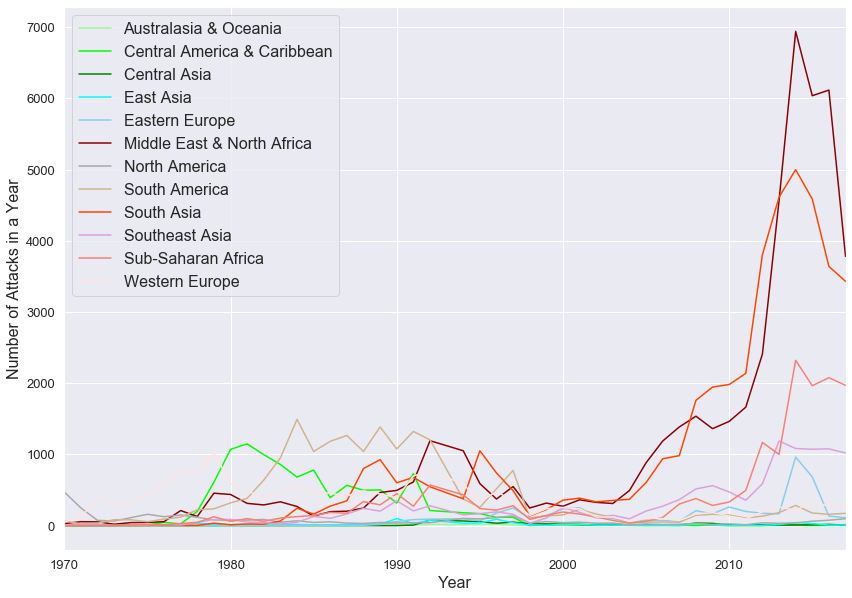

In [19]:
fig = plt.figure(figsize=(11, 10))

color_reg_yr = ['palegreen', 'lime', 'green', 'Aqua', 'skyblue', 'darkred', 'darkgray', 'tan', 
                     'orangered', 'plum', 'salmon', 'mistyrose']
reg_yr.plot(figsize=(14, 10), fontsize=13, color=color_reg_yr)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Attacks in a Year', fontsize=16)
plt.legend(fontsize=16)

In [24]:
terror_data_selected['Year10'] = pd.cut(terror_data_selected['Year'], bins=[1969, 1980, 1990, 2000, 2010, 2020], 
               labels=['1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2020'])


In [25]:
#grabbing the every decade data by using crosstab

yr_decade = pd.crosstab(terror_data_selected.Year10, terror_data_selected.Region,)
yr_decade.head(6)

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year10,,,,,,,,,,,,
1970-1980,23,1988,0,79,27,1527,1671,1328,63,281,300,5289
1980-1990,89,6736,0,208,100,2940,520,10455,3460,1347,1968,4562
1990-2000,101,1545,356,336,1238,5201,658,4837,4596,1551,2429,3841
2000-2010,23,46,136,70,1353,9304,253,1147,9650,2924,1860,1286
2010-2020,46,29,71,109,2426,31502,354,1211,27205,6382,10993,1661


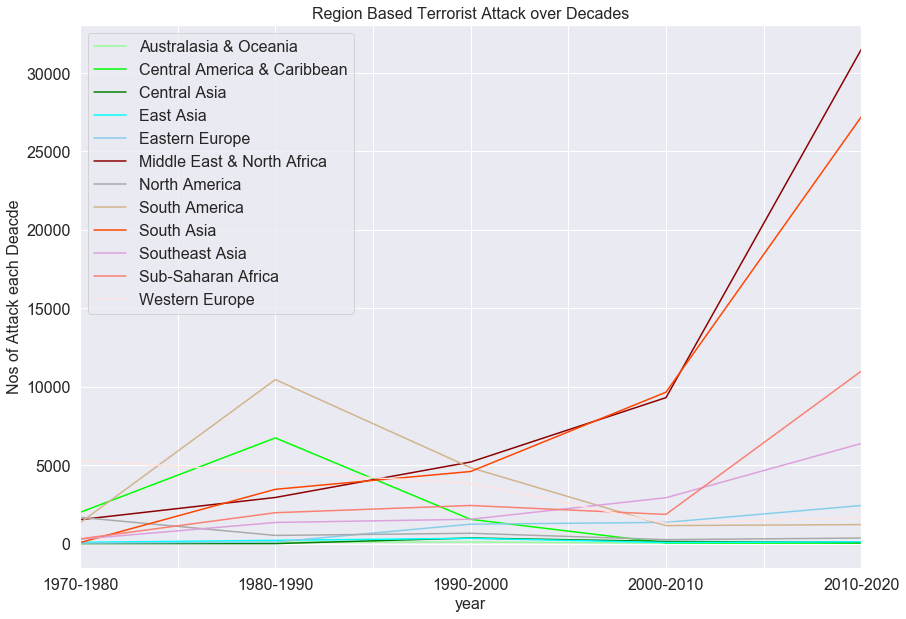

In [26]:
# now region base attacks are shown here for every deacde


yr_decade.plot(figsize=(14,10), fontsize=16, color=color_reg_yr)

plt.xlabel('year',fontsize=16)
plt.ylabel('Nos of Attack each Deacde', fontsize=16)
plt.title('Region Based Terrorist Attack over Decades', fontsize=16)
plt.legend(fontsize=16)

In [27]:
# types of weapon used in every region over the particular decades

weapon_type_reg_decade = pd.crosstab(terror_data_selected.Year10, terror_data_selected.WeaponType)
weapon_type_reg_decade.head(6)

WeaponType,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,Vehicle
Year10,,,,,,,,,,,,
1970-1980,0,35,5478,4,4127,1475,91,6,2,5,1351,2
1980-1990,8,21,14769,1,12661,1919,315,6,1,24,2651,9
1990-2000,1,65,10242,18,9651,2650,1163,32,10,11,2828,18
2000-2010,22,73,15536,6,8682,1483,566,17,1,44,1605,17
2010-2020,4,127,46401,4,23403,3608,1520,53,0,57,6722,90


In [ ]:
# plotting the weapon used over each decades

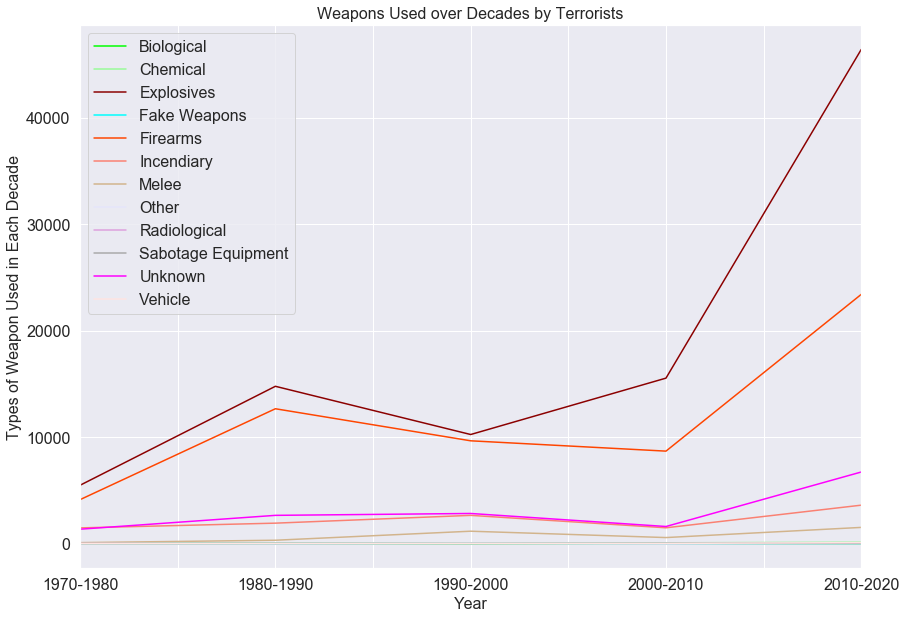

In [30]:
color_weapon = ['lime', 'palegreen', 'darkred', 'Aqua', 'orangered', 'salmon', 'tan', 'lavender', 'plum', 'darkgray', 'magenta', 'mistyrose']
weapon_type_reg_decade.plot(figsize=(14, 10), fontsize=16, color=color_weapon)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Types of Weapon Used in Each Decade', fontsize=16)
plt.title('Weapons Used over Decades by Terrorists', fontsize=16)
plt.legend(fontsize=16)

In [31]:
# using of groupby

reg_groupby = terror_data_selected.groupby(['Region'])
reg_groupby_df = reg_groupby.get_group('South Asia')

reg_groupby_df.head(5)

,Id,Year,Country,Region,City,Lat,Long,Success,AttackType,TargetType,WeaponType,Kill,Wounded,TerroristGroup,Year10
585,197011010001,1970,Pakistan,South Asia,Karachi,24.891115,67.143311,1,Assassination,Government (Diplomatic),Vehicle,4.0,20.0,Unknown,1970-1980
1186,197202220004,1972,India,South Asia,New Delhi,28.585836,77.153336,1,Hijacking,Airports & Aircraft,Explosives,0.0,0.0,Palestinians,1970-1980
1863,197305010002,1973,Afghanistan,South Asia,Kabul,34.516895,69.147011,0,Unknown,Airports & Aircraft,Unknown,0.0,1.0,Black December,1970-1980
2217,197402020001,1974,Pakistan,South Asia,Karachi,24.891115,67.143311,1,Bombing/Explosion,Maritime,Firearms,0.0,0.0,Muslim Guerrillas,1970-1980
2705,197412090001,1974,Pakistan,South Asia,Peshawar,34.006004,71.537430,1,Bombing/Explosion,Government (Diplomatic),Explosives,0.0,2.0,Unknown,1970-1980


In [32]:
#dataframe of south asia
print ('shape of South Asia : ', reg_groupby_df.shape) 

reg_groupby_df['Country'].value_counts()

shape of South Asia :  (44974, 15)


Pakistan       14368
Afghanistan    12731
India          11960
Sri Lanka       3022
Bangladesh      1648
Nepal           1215
Maldives          22
Bhutan             6
Mauritius          2
Name: Country, dtype: int64

Text(0.5, 1.0, 'South Asian Countries Affected in Terrorist Attack ')

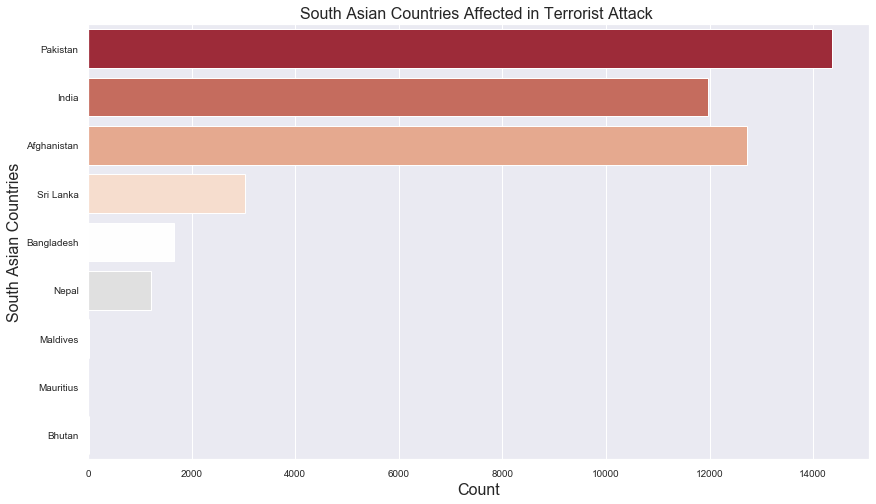

In [33]:
# plotting the South asian countries affected in terrorist attack

f = plt.figure(figsize=(14, 8))

sns.set(font_scale=0.9)
Country_count = sns.countplot(y='Country', data=reg_groupby_df, palette='RdGy')
# year_count.set_xticklabels(year_count.get_xticklabels(), rotation=70)
Country_count.set_xlabel('Count', fontsize=16)
Country_count.set_ylabel('South Asian Countries', fontsize=16)
plt.title('South Asian Countries Affected in Terrorist Attack ', fontsize=16)

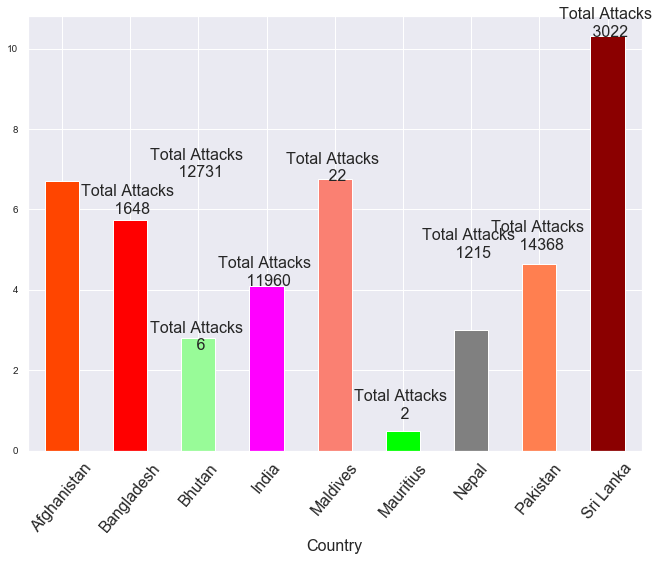

In [34]:
# plotting all the killed and injured

reg_groupby_df['Affected'] = reg_groupby_df['Kill'] + reg_groupby_df['Wounded']
f = plt.figure(figsize=(11, 8))
reg_groupby_df_country_affected = reg_groupby_df.groupby(['Country'])['Affected'].mean()
reg_plot_check = reg_groupby_df_country_affected.plot.bar(color=['orangered', 'red', 'palegreen', 'magenta', 'salmon', 'lime', 'gray', 'coral', 'darkred'])
reg_plot_check.set_xticklabels(reg_plot_check.get_xticklabels(), rotation=50, fontsize=16)

plt.xlabel('Country', fontsize=16)

plt.text(8, 10.3, 'Total Attacks \n {}'.format(reg_groupby_df['Country'].value_counts()['Sri Lanka']), horizontalalignment='center', fontsize=16)
plt.text(7, 5, 'Total Attacks \n {}'.format(reg_groupby_df['Country'].value_counts()['Pakistan']), horizontalalignment='center', fontsize=16)
plt.text(6, 4.8, 'Total Attacks \n {}'.format(reg_groupby_df['Country'].value_counts()['Nepal']), horizontalalignment='center', fontsize=16)
plt.text(5, 0.8, 'Total Attacks \n {}'.format(reg_groupby_df['Country'].value_counts()['Mauritius']), horizontalalignment='center', fontsize=16)
plt.text(4, 6.7, 'Total Attacks \n {}'.format(reg_groupby_df['Country'].value_counts()['Maldives']), horizontalalignment='center', fontsize=16)
plt.text(3, 4.1, 'Total Attacks \n {}'.format(reg_groupby_df['Country'].value_counts()['India']), horizontalalignment='center', fontsize=16)
plt.text(2, 2.5, 'Total Attacks \n {}'.format(reg_groupby_df['Country'].value_counts()['Bhutan']), horizontalalignment='center', fontsize=16)
plt.text(1, 5.9, 'Total Attacks \n {}'.format(reg_groupby_df['Country'].value_counts()['Bangladesh']), horizontalalignment='center', fontsize=16)
plt.text(2, 6.8, 'Total Attacks \n {}'.format(reg_groupby_df['Country'].value_counts()['Afghanistan']), horizontalalignment='center', fontsize=16)

plt.show()

In [35]:
# affected a single terriost attack in South Asia
south_asia_affected = reg_groupby_df.sort_values('Affected', ascending=False).head(5)
south_asia_affected

,Id,Year,Country,Region,City,Lat,Long,Success,AttackType,TargetType,WeaponType,Kill,Wounded,TerroristGroup,Year10,Affected
61548,199601310002,1996,Sri Lanka,South Asia,Colombo,6.941837,79.861687,1,Bombing/Explosion,Business,Explosives,90.0,1272.0,Liberation Tigers of Tamil Eelam (LTTE),1990-2000,1362.0
81098,200607120001,2006,India,South Asia,Mumbai,19.075984,72.877656,1,Bombing/Explosion,Transportation,Explosives,188.0,817.0,Lashkar-e-Taiba (LeT),2000-2010,1005.0
76347,200403210001,2004,Nepal,South Asia,Dhading district,27.959441,84.895897,1,Armed Assault,Government (General),Firearms,518.0,216.0,Communist Party of Nepal- Maoist (CPN-M),2000-2010,734.0
175415,201705310001,2017,Afghanistan,South Asia,Kabul,34.516895,69.147011,1,Bombing/Explosion,Government (Diplomatic),Explosives,93.0,491.0,Khorasan Chapter of the Islamic State,2010-2020,584.0
153580,201509280037,2015,Afghanistan,South Asia,Kunduz,36.705776,68.877060,1,Armed Assault,Private Citizens & Property,Firearms,240.0,296.0,Taliban,2010-2020,536.0


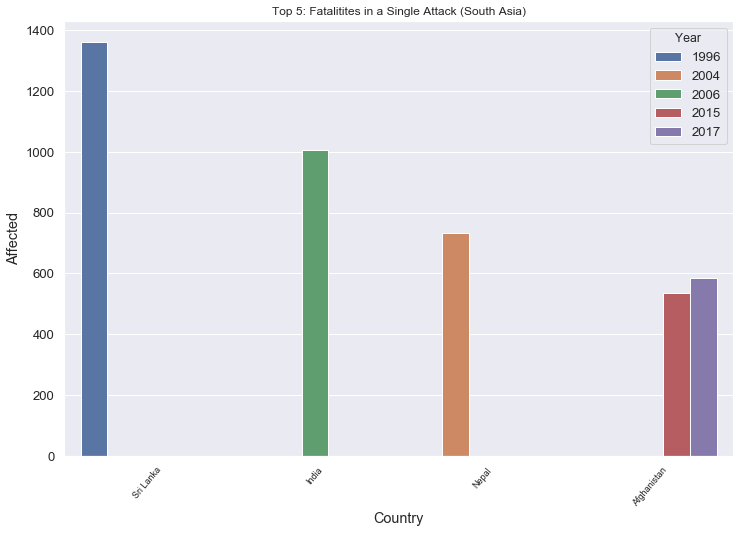

In [36]:
#showing above data by plotting

fig = plt.figure(figsize=(12, 8))
sns.set(font_scale=1.2)
top_5_fatal = sns.barplot(y='Affected', x='Country', data=south_asia_affected , hue='Year', )
top_5_fatal.set_xticklabels(top_5_fatal.get_xticklabels(), rotation=50, fontsize=9)

plt.title('Top 5: Fatalitites in a Single Attack (South Asia)', fontsize=12)
plt.show()